# Temperature and Phase comparison

In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import subprocess
from matplotlib.animation import FuncAnimation

from matplotlib.colors import ListedColormap
from scipy.io import loadmat
import natsort, pathlib
import os
import glob

path = os.path.abspath('../numpy_files/m4/')

In [2]:
temp = np.load(path+'/temp.npy')
Au_LIQ = np.load(path+'/Au_LIQ.npy')

Au_LIQ = np.clip(Au_LIQ, 0.06, 0.90)

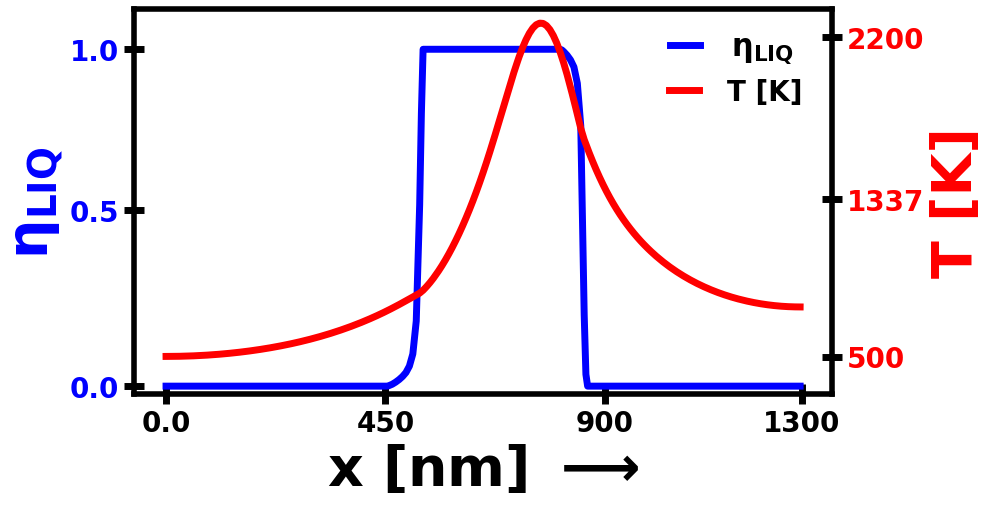

In [24]:
t_step = 270

fig, (ax1) = plt.subplots(1, 1, figsize=(9,5), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


ax1.plot(Au_LIQ[1,:,t_step], linewidth=5, color='blue', label=r'$\mathbf{\eta_{LIQ}}$')
ax1.set_ylim([0.04,1.0])
ax1.set_ylabel("$\mathbf{\eta_{LIQ}}$",  weight = 'bold', size=40, color='blue')
ax1.yaxis.set_tick_params(labelcolor='blue', labelsize=17)  
ax1.set_yticks([0.06, 0.5, 0.9], labels=['0.0', '0.5', '1.0'], size=20, color='blue', weight='bold')

ax1.set_xlabel("x [nm] $\mathbf{\longrightarrow}$",  weight = 'bold', size=40, color='k')
ax1.set_xticks([0, 128, 256, 371], labels=['0.0', f'{(1300/371)*128.5:.0f}', f'{(1300/371)*256.8:.0f}', '1300'], size=20, color='k', weight='bold')
ax1.tick_params(axis='y', direction='inout', which='both', length=15, width=5)
ax1.tick_params(axis='x', direction='inout', which='both', length=15, width=5)
legend_1 = ax1.legend(loc=(0.75,0.82), prop={'weight':'bold', 'size':'22',}, handletextpad=1.0, handlelength=1.0,   frameon=False).get_frame().set_facecolor('none')


ax2 = ax1.twinx()
ax2.plot(temp[1,:,t_step], linewidth=5, color='red', label='T [K]')
ax2.set_ylim([300,2350])
ax2.set_ylabel("T [K]",  weight = 'bold', size=40, color='red')
ax2.yaxis.set_tick_params(labelcolor='red', labelsize=17)  
ax2.set_yticks([500, 1337, 2200], labels=['500', '1337', '2200'], size=20, color='red', weight='bold')
ax2.tick_params(axis='y', direction='inout', which='both', length=15, width=5)
legend_2 = ax2.legend(loc=(0.75,0.72), prop={'weight':'bold', 'size':'20',}, handletextpad=1.0, handlelength=1.1,   frameon=False).get_frame().set_facecolor('none')

ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')

plt.savefig('for_manuscript/phase_temp_b.png', bbox_inches='tight', dpi=800)
plt.show()

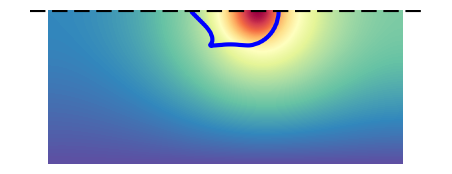

In [342]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,2), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(temp[:,:,t_step], cmap='Spectral_r', interpolation='bilinear')

contour_levels = [0.8]
contour = plt.contour(Au_LIQ[:, :, t_step], levels=contour_levels, colors='blue', linewidths=3,)
for label in clabels: label.set_fontweight('bold')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)
# ax1.spines[:].set_color('k')
ax1.hlines(y=0, xmin=-20, xmax=391, linewidth=3, linestyle ='--', color= 'k')

plt.savefig('for_manuscript/phase_temp_a.png', bbox_inches='tight', dpi=800)

# dynamic viscosity 

In [2]:
import sympy as sp

def solve_equation():
    # Define symbols
    x, T = sp.symbols('x T')

    # Define the equation
    equation = sp.Eq(sp.ln(x), -0.1990 + 2669/T)

    # Solve the equation for x
    solution = sp.solve(equation, x)

    return solution

solution = solve_equation()
print("Solution for x:")
print(solution)


Solution for x:
[exp(0.001*(2669000.0 - 199.0*T)/T)]


In [3]:
import sympy as sp

def solve_and_simplify_equation():
    # Define symbols
    x, T = sp.symbols('x T')

    # Define the equation
    equation = sp.Eq(sp.ln(x), -0.1990 + 2669/T)

    # Solve the equation for x
    solution = sp.solve(equation, x)

    # Simplify the solution
    simplified_solution = [sp.simplify(sol) for sol in solution]

    return simplified_solution

solution = solve_and_simplify_equation()
print("Simplified solution for x:")
print(solution)


Simplified solution for x:
[0.819549893332926*exp(2669.0/T)]


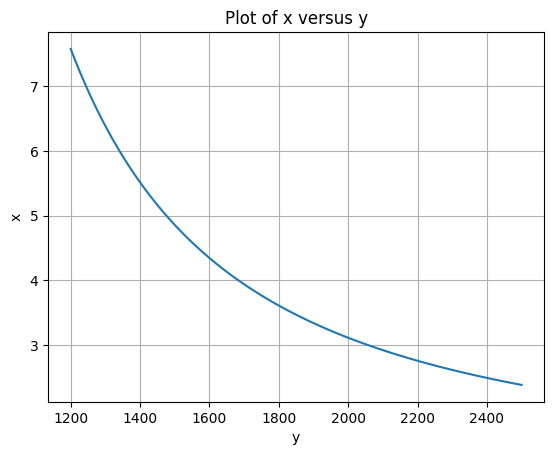

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(y):
    return 0.819549893332926 * np.exp(2669.0 / y)

# Generate y values ranging from 500 to 2500
y_values = np.linspace(1200, 2500, 100)

# Calculate corresponding x values using the function
x_values = func(y_values)

# Plot the function
plt.plot(y_values, x_values)
plt.xlabel('y')
plt.ylabel('x')
plt.title('Plot of x versus y')
plt.grid(True)
plt.show()


In [15]:
0.819549893332926 * np.exp(2669.0 / 2000)

3.1127295186380985

In [16]:
2669*8.31

22179.390000000003

In [1]:
A = -1.66755674e-06
B = 4.80727332e-03
C = 1.47783620e+01
T = 300
k = A*T**2 + B*T + C
k

16.0704638894

In [2]:
A = 0
B= -6.93088808e-02
C = 3.38918567e+02
T = 300
k = A*T**2 + B*T + C
k


318.12590276

In [4]:
D = 0.027397
E = 100.0
T = 300

D*T + E

108.2191

In [6]:
0.75*16.07+0.25*318.125

91.58375

In [7]:
A = 0
B = -1.20
C = 19657.6
T = 300
rho =  A*T**2 + B*T + C
rho

19297.6

In [8]:
D = -1.44
E = 19325.28

D*T + E

18893.28

In [9]:
A = -6.12812244e-05
B = -1.17609767e-01
C = 4.54557156e+03

T = 300
rho = A*T**2 + B*T + C
rho

4504.773319704001

In [11]:
0.75*4504.77+0.25*19297.6

8202.9775

In [ ]:
fos_sp3, alpha_sp3, beta_sp3 = 1, 5.08e7,-0.0144

fos_sp3*(alpha_sp3*exp(beta_sp3*temp)+pseudo_sp3)